In [1]:
##mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json

In [34]:
with open('/content/drive/My Drive/DL_exp/result/loss.json', mode='r') as readjson:
  epoch_loss = json.loads(readjson.read())
  print(len(epoch_loss))

6480


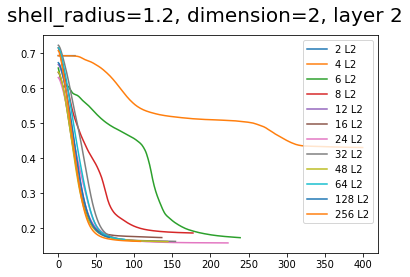

In [33]:
tmp_h = [2,4,6,8,12,16,24,32,48,64,128,256] 
tmp_i = [100,200,300,400,500,600,700,800,900,1000]
dimentions = [2,4,8,16,32,64] 
fig = plt.figure()
for t_h in tmp_h:
#   tt = np.array(epoch_loss['sh'+ str(1.2)+'dim'+str(2)+'h'+str(t_h)+'i'+str(1000)])
#   epoch = tt[:,0]
#   loss = tt[:,1]
#   plt.plot(epoch,loss,label=str(t_h)+' L1')
  tt = np.array(epoch_loss['sh'+ str(1.2)+'dim'+str(2)+'h'+str(t_h)+'i'+str(1000)+'l2'])
  epoch = tt[:,0]
  loss = tt[:,1]
  plt.plot(epoch,loss,label=str(t_h)+' L2')
plt.legend(loc='upper right')
fig.suptitle('shell_radius=1.2, dimension=2, layer 2', fontsize=20)
# fig.savefig('/content/drive/My Drive/DL_exp/result/plots/6.jpg')

In [35]:
with open('/content/drive/My Drive/DL_exp/result/uniform_result.json', mode='r') as readjson:
  result = json.loads(readjson.read())
  print(len(result))
np.unique([[d['shell_radius'],len(d['n_nodes'])] for d in result],axis=0)

7446


array([[1.2, 1. ],
       [1.2, 2. ],
       [1.4, 1. ],
       [1.5, 1. ],
       [1.5, 2. ],
       [1.6, 1. ],
       [1.6, 2. ],
       [1.8, 1. ],
       [1.8, 2. ],
       [2. , 1. ]])

In [0]:
dim = 64
sr = 1.5
hl = 1
# rs = 400
accuracy = [d['accuracy'] for d in result if len(d['n_nodes'])==hl and d['dimension']==dim and d['shell_radius']==sr ]
n_nodes = [d['n_nodes'][0] for d in result if len(d['n_nodes'])==hl and d['dimension']==dim and d['shell_radius']==sr ]

(0, 66)

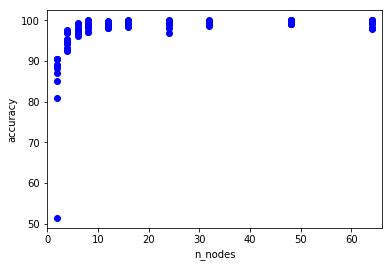

In [37]:
fig = plt.figure()
plt.plot(n_nodes,accuracy,'bo')
plt.xlabel('n_nodes')
plt.ylabel('accuracy')
axes = plt.gca()
# fig.set_size_inches(10, 5)
# plt.xticks(np.arange(0, 65, 2))
axes.set_xlim([0,66])
# axes.set_ylim([99,101])
# fig.suptitle('shell_radius=1.6, dimension=8, layer 2', fontsize=20)
# fig.savefig('/content/drive/My Drive/DL_exp/result/graph/14.jpg')

In [0]:
dim increases epoch increases